# Unsupervised learning with Agglomerative Hierarchical Clustering (AHC)
### Dataset 1: [A3-data.txt](input/A3-data.txt)

### Description of the technique
Agglomerative Hierarchical Clustering (AHC) is a clustering (or classification) method which has the following advantages:

- It works from the dissimilarities between the objects to be grouped together. A type of dissimilarity can be suited to the subject studied and the nature of the data.
- One of the results is the dendrogram which shows the progressive grouping of the data. It is then possible to gain an idea of a suitable number of classes into which the data can be grouped.

### Objective
Use the unweighted average (UPGMA) and complete linkage (CL) methods of AHC, using as input the matrix of Euclidean distances between the original patterns, and use different colors to represent the patterns in each original class

## Index
<nav>

* [Import modules](#1)
* [Loading dataset](#2)
* [Plot dendogram function](#3)
* [Agglomerative Clustering](#4)
    * [AHC - Unweighted average (UPGMA) linkage](#5)
    * [AHC - Unweighted average (UPGMA) linkage](#6)
* [References](#7)
</nav>

<a id="1"></a>
## Import modules

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

<a id="2"></a>
## Loading dataset

In [5]:
# Load training data
filename = 'input\\A3-data.txt'
df = pd.read_csv(filename, delimiter=',', header=0)
print(df)

features = ['x', 'y', 'z', 't']
target = ['class']

# Separating out the features
X = df.loc[:, features].values

            x         y         z         t  class
0   -0.031676 -9.912054 -0.579436 -1.044239      1
1    0.002526  6.172456  3.288339 -1.006427      5
2    0.183123 -0.387841  6.236470 -1.691491      2
3   -0.042262 -1.996272 -1.655302 -2.995311      1
4   -0.062811 -0.417072  6.657475 -3.633134      4
..        ...       ...       ...       ...    ...
355 -0.340733  8.504536  7.903644 -2.032197      6
356 -0.024928  1.551977  6.361992 -0.757714      2
357 -0.668529 -0.607597  0.639295  4.329213      6
358 -0.122711 -5.516957 -2.111173  2.209675      3
359  0.740207 -7.492176  1.959426 -7.119918      6

[360 rows x 5 columns]


<a id="3"></a>
## Plot dendogram function

In [15]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

<a id="4"></a>
## Agglomerative Clustering
The **AgglomerativeClustering** object performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. The linkage criteria determines the metric used for the merge strategy:
- **Complete linkage** minimizes the maximum distance between observations of pairs of clusters.
- **Average linkage** minimizes the average of the distances between all observations of pairs of clusters.

<a id="5"></a>
### AHC - Unweighted average (UPGMA) linkage

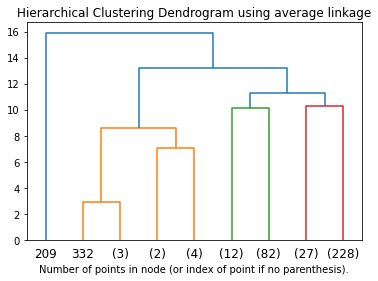

In [23]:
# ‘average’ uses the average of the distances of each observation of the two sets.
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(affinity='euclidean', linkage='average', distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram using average linkage")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

<a id="6"></a>
### AHC - Complete linkage (CL) linkage

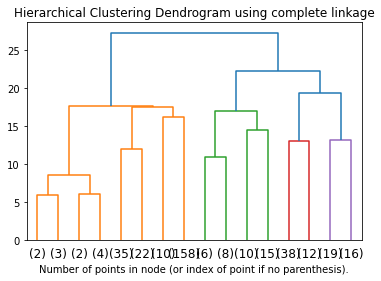

In [24]:
# ‘complete’ linkage uses the maximum distances between all observations of the two sets.
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(affinity='euclidean', linkage='complete', distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram using complete linkage")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

<a id="7"></a>
## References

Agglomerative Hierarchical Clustering (AHC):

- [Hierarchical clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering)
- [sklearn.cluster.AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)
- [Plot Hierarchical Clustering Dendrogram](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py)

Dendogram:

- [Dendrogram](https://en.wikipedia.org/wiki/Dendrogram)